In [17]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from keras import datasets, layers, models

In [18]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [19]:
len(X_train)

60000

In [20]:
len(X_test)

10000

In [21]:
X_train.shape

(60000, 28, 28)

60000 images, each of dimensions 28*28

In [22]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

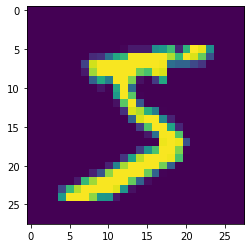

In [23]:
plt.imshow(X_train[0])

In [24]:
y_train[0]

5

In [25]:
X_train = X_train/255.0
X_test = X_test/255.0

In [26]:
y_train.shape

(60000,)

In [27]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [28]:
X_train[0].shape

(28, 28)

In [32]:
cnn = models.Sequential([
                         layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),
                         layers.MaxPooling2D((2,2)),

                         layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                         layers.MaxPooling2D((2,2)),

                         layers.Flatten(),
                         layers.Dense(64, activation='relu'),
                         layers.Dense(10, activation='softmax')

])

In [34]:
cnn.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [35]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.1476 - accuracy: 0.9543
Epoch 2/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0468 - accuracy: 0.9852
Epoch 3/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0333 - accuracy: 0.9894
Epoch 4/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0240 - accuracy: 0.9921
Epoch 5/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0178 - accuracy: 0.9944
Epoch 6/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0144 - accuracy: 0.9952
Epoch 7/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0119 - accuracy: 0.9964
Epoch 8/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0098 - accuracy: 0.9965
Epoch 9/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0073 - accuracy: 0.9977
Epoch 10/10
1875/1875 [==============================] - 57s 30m

In [36]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.0403 - accuracy: 0.9910


[0.04026322066783905, 0.9909999966621399]

In [37]:
y_pred=cnn.predict(X_test)

In [38]:
y_pred[:5]

array([[2.4179393e-11, 4.0450460e-12, 2.6479015e-09, 9.8811356e-13,
        9.2813712e-13, 3.5772402e-11, 5.5910196e-21, 1.0000000e+00,
        8.5014793e-14, 2.1711197e-09],
       [2.4004970e-10, 2.4289187e-10, 1.0000000e+00, 6.4085313e-18,
        3.5495706e-15, 1.2349922e-20, 1.3562783e-12, 8.9080534e-20,
        1.9447455e-14, 4.8964146e-18],
       [1.0152211e-11, 1.0000000e+00, 1.8851647e-13, 6.5235524e-16,
        1.4844397e-10, 1.0343015e-10, 2.8942493e-10, 2.8397775e-08,
        5.5630400e-11, 4.3513713e-12],
       [1.0000000e+00, 2.5396962e-16, 3.1936162e-11, 1.0073833e-12,
        5.8961782e-13, 1.3253244e-13, 3.2953121e-08, 1.3380107e-14,
        7.5994229e-15, 1.5445184e-10],
       [3.3526417e-12, 1.5613304e-13, 1.4172232e-11, 8.5649335e-11,
        9.9999976e-01, 8.7803664e-10, 2.7017180e-09, 1.0247261e-11,
        3.8296539e-09, 1.9220565e-07]], dtype=float32)

In [39]:
y_classes = [np.argmax(element) for element in y_pred]

In [40]:
y_classes[:5]

[7, 2, 1, 0, 4]

In [41]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [43]:
from sklearn.metrics import confusion_matrix , classification_report
print("classification report \n", classification_report(y_test, y_classes))

classification report 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.98      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

